# **Étape 1 : Prétaitement des données**

**1-Chargement des données :**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Charger les données
data=pd.read_csv('/content/immobilier.csv')
print(data.info())  # Vérification des types et valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   surface             1000 non-null   int64 
 1   chambres            1000 non-null   int64 
 2   salles_de_bain      1000 non-null   int64 
 3   quartier            1000 non-null   object
 4   annee_construction  1000 non-null   int64 
 5   prix                1000 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 47.0+ KB
None


**2-Gestion des valeurs manquantes :**

In [ ]:
# Remplir les valeurs manquantes des colonnes numériques par la médiane
# La médiane est utilisée ici pour éviter l'impact des valeurs extrêmes (outliers).
data['surface'] = data['surface'].fillna(data['surface'].median())
data['chambres'] = data['chambres'].fillna(data['chambres'].median())
data['salles_de_bain'] = data['salles_de_bain'].fillna(data['salles_de_bain'].median())
# Remplir les valeurs manquantes des colonnes catégoriques par le mode
# Le mode est la valeur la plus fréquente, pratique pour des données comme des catégories ou des zones géographiques.
data['quartier'] = data['quartier'].fillna(data['quartier'].mode()[0])
data['annee_construction'] = data['annee_construction'].fillna(data['annee_construction'].median())

**3-Encodage des variables catégoriques :**

   surface  chambres  salles_de_bain  annee_construction    prix  \
0      152         1               3                2001  361497   
1      229         3               1                2019  689421   
2      142         5               2                2004  821818   
3       64         2               2                1982  479747   
4      156         1               3                2011  258598   

   quartier_encoded  
0                 2  
1                 1  
2                 2  
3                 0  
4                 3  
                     surface  chambres  salles_de_bain  annee_construction  \
surface             1.000000 -0.036583       -0.037895           -0.031496   
chambres           -0.036583  1.000000        0.015012            0.033576   
salles_de_bain     -0.037895  0.015012        1.000000           -0.009841   
annee_construction -0.031496  0.033576       -0.009841            1.000000   
prix               -0.017666  0.022820       -0.031612            0.0

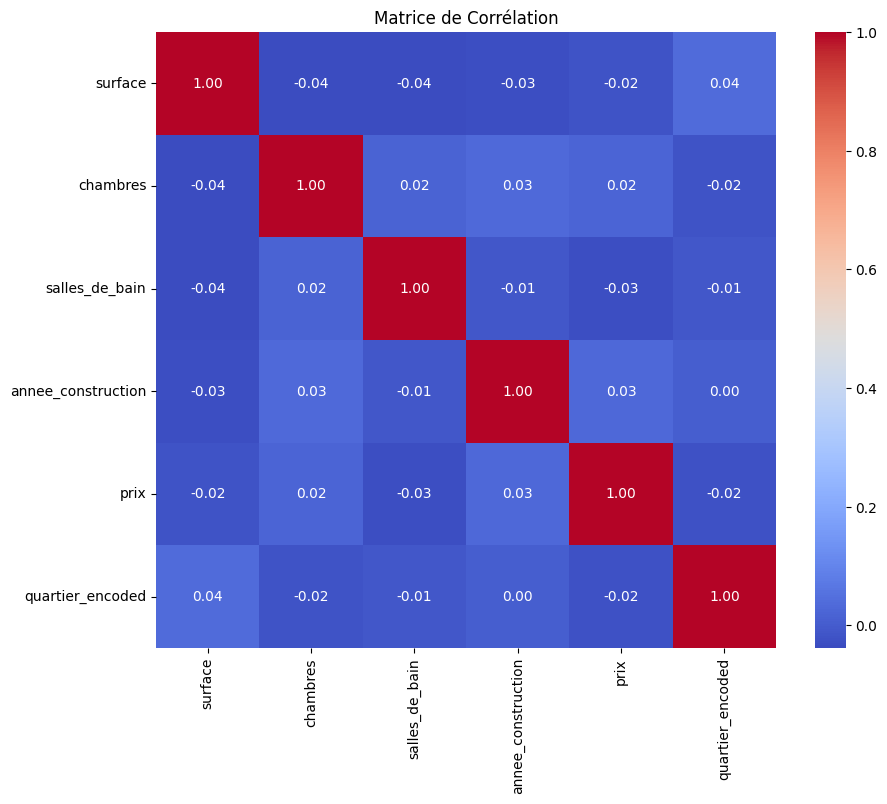

In [ ]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
# Créer un objet LabelEncoder
label_encoder = LabelEncoder()

# Vérifier que la colonne 'quartier' existe
if 'quartier' in data.columns:
    # Appliquer l'encodage sur la colonne 'quartier'
    data['quartier_encoded'] = label_encoder.fit_transform(data['quartier'])

    # Optionnel : supprimer la colonne originale 'quartier'
    data.drop(columns=['quartier'], inplace=True)
else:
    print("La colonne 'quartier' n'existe pas dans le DataFrame")

# Vérifier les données après encodage
print(data.head())
# Calculer la matrice de corrélation (colonnes numériques uniquement)
correlation_matrix = data.corr()

# Afficher la matrice brute (optionnel)
print(correlation_matrix)

# Visualiser la matrice de corrélation sous forme de carte thermique (heatmap)
plt.figure(figsize=(10, 8))  # Ajuster la taille de la figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()



**4-Normalisation des variables numériques :**

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardiser les variables numériques pour avoir une moyenne de 0 et un écart-type de 1
scaler = StandardScaler()
numerical_features = ['surface', 'chambres', 'salles_de_bain', 'annee_construction']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

**5-Séparation des données en ensembles d'entraînement et de test :**

In [ ]:
# Définir les variables explicatives (X) et la variable cible (y)
X = data.drop(columns=['prix']) # Supprimer la colonne cible
y = data['prix']# Variable cible
# Diviser les données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Étape 2 : Exploration des données**

**1-Analyse des relations entre les caractéristiques et le prix :**

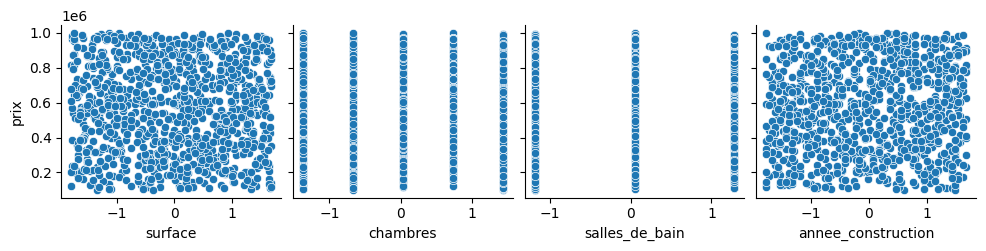

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Créer des graphiques pairplots pour visualiser les relations entre les variables numériques et le prix
sns.pairplot(data, y_vars=['prix'], x_vars=numerical_features)
plt.show()


**2-Identification des caractéristiques importantes :**

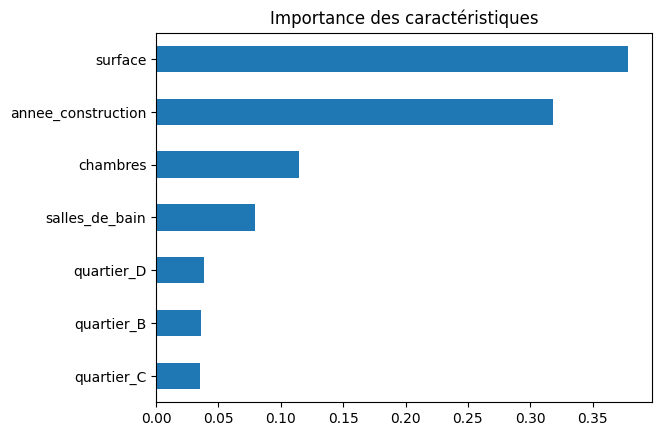

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Ajuster un modèle de forêt aléatoire pour évaluer l'importance des caractéristiques
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
# Visualiser l'importance des caractéristiques
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.sort_values().plot(kind='barh', title="Importance des caractéristiques")
plt.show()


# **Étape 3 : Choix du modèle**

**1-Essayer plusieurs modèles:**

• **Régression linéaire**

• **Régression Ridge et Lasso**

• **Arbre de décision**

• **Forét aléatoire (Random Forest)**

• **Algorithmes de Gradient Boosting (XGBoost, LightGBM)**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Dictionnaire des modèles à tester
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

results = {}
# Boucle pour entraîner et évaluer chaque modèle
for name, model in models.items():
    model.fit(X_train, y_train)# Entraîner le modèle
    y_pred = model.predict(X_test) # Prédire sur l'ensemble de test
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),  # Erreur absolue moyenne
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),# Erreur quadratique moyenne
        'R2': r2_score(y_test, y_pred)# Coefficient de détermination
    }
 # Convertir les résultats en DataFrame pour comparaison
pd.DataFrame(results).T


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

,MAE,RMSE,R2
Linear Regression,297041.094269,324221.570114,-0.203575
Ridge Regression,289856.772938,318241.507495,-0.159586
Lasso Regression,297037.835152,324219.064476,-0.203557
Decision Tree,267860.506245,360688.499159,-0.489547
Random Forest,272964.449246,318452.551897,-0.161125
XGBoost,271934.488579,337486.251020,-0.304072



# **Étape 4 : Optimisation du modéle choisi qui est Ridge Regression**

# **Étape 5 : Évaluation finale :**

• **MAE (Mean Absolute Error)**

• **RMSE (Root Mean Squared Error)**

• **R² (coefficient de d´etermination)**


In [ ]:
# Entraîner le modèle Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = ridge_model.predict(X_test)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print("Ridge Regression - Performance:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Ridge Regression - Performance:
MAE: 289856.77293838665
RMSE: 318241.50749549177
R²: -0.1595864859592988


# **Étape 6 : Affichage du graphique (La courbe)**

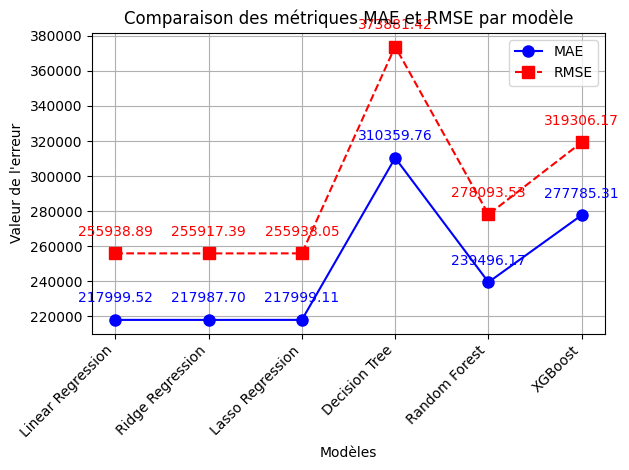

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Données des modèles et leurs métriques (MAE et RMSE)
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
mae_values = [217999.519033, 217987.703822, 217999.106138, 310359.755000, 239496.173200, 277785.310117]
rmse_values = [255938.892755, 255917.392940, 255938.054215, 373881.420741, 278093.534499, 319306.169247]

# Créer un axe pour les modèles
x = np.arange(len(models))

# Tracer les courbes MAE et RMSE
plt.plot(x, mae_values, marker='o', color='b', linestyle='-', label="MAE", markersize=8)
plt.plot(x, rmse_values, marker='s', color='r', linestyle='--', label="RMSE", markersize=8)

# Ajouter le titre et les labels
plt.title('Comparaison des métriques MAE et RMSE par modèle')
plt.xlabel('Modèles')
plt.ylabel('Valeur de l\'erreur')
plt.xticks(x, models, rotation=45, ha='right')  # Placer les étiquettes sur l'axe X et les faire pivoter

# Afficher les valeurs des métriques sur la courbe
for i, (mae, rmse) in enumerate(zip(mae_values, rmse_values)):
    plt.text(i, mae + 10000, f'{mae:.2f}', ha='center', fontsize=10, color='b')
    plt.text(i, rmse + 10000, f'{rmse:.2f}', ha='center', fontsize=10, color='r')

# Affichage de la légende
plt.legend()

# Affichage du graphique
plt.grid(True)
plt.tight_layout()  # Pour éviter que les labels ne soient coupés
plt.show()


# **Étape 7 : Modéle déployable : Sauvegarde du modéle entrainé (fichier ridge_model.pkl) et une API Flask ou FastAPI pour permettre des prédictions en temps réel**

In [ ]:
# Sauvegarder le modèle
joblib.dump(ridge_model, 'ridge_model.pkl')

['ridge_model.pkl']

In [ ]:
from fastapi import FastAPI
import joblib
import numpy as np

# Charger le modèle Ridge enregistré
model = joblib.load('ridge_model.pkl')

# Créer une application FastAPI
app = FastAPI()

@app.post("/predict/")
def predict(features: dict):
    # Préparer les données d'entrée pour la prédiction
    X = np.array([
        features['surface'], features['chambres'], features['salles_de_bain'],
        features['annee_construction'], features['quartier_A'], features['quartier_B'],
        features['quartier_C'], features['quartier_D']
    ]).reshape(1, -1)

    # Effectuer la prédiction
    prediction = model.predict(X)
    return {"prediction": prediction[0]}  # Retourner la prédiction



In [ ]:
!pip install uwsgi


In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

# Charger le modèle Ridge enregistré
model = joblib.load('/content/ridge_model.pkl')

# Créer une application Flask
app = Flask(__name__)

@app.route('/predict/', methods=['POST'])
def predict():
    # Récupérer les données JSON envoyées dans la requête
    data = request.get_json()

    # Extraire les caractéristiques depuis les données JSON
    features = np.array([
        data['surface'], data['chambres'], data['salles_de_bain'],
        data['annee_construction'], data['quartier_A'], data['quartier_B'],
        data['quartier_C'], data['quartier_D']
    ]).reshape(1, -1)  # Redimensionner en un tableau 2D pour la prédiction

    # Faire une prédiction avec le modèle chargé
    prediction = model.predict(features)

    # Retourner la prédiction sous forme de JSON
    return jsonify({"prediction": prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
